In [ ]:
# 1. Các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from pydlm import dlm, trend, dynamic
import matplotlib.pyplot as plt
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason

In [ ]:
#import dataset
df = pd.read_csv('acb.csv')
df = df[['Price','High']]
df = df.dropna()
df = df.reset_index(drop=True)
df

,Price,High
0,11615.4,11645.3
1,11585.5,11705.2
2,11615.4,11645.3
3,11615.4,11825.0
4,12004.6,12004.6
...,...,...
1480,22400.0,22500.0
1481,22500.0,22500.0
1482,22300.0,22550.0
1483,22500.0,22750.0


In [ ]:
#RATIO 7:3

In [ ]:
# split data ratio 7:3
train_size73 = int(0.7 * len(df))
test_size73 = int(0.3 * len(df))

train_data73 = df[:train_size73]
test_data73 = df[train_size73:train_size73+test_size73]

In [ ]:
import statsmodels.api as sm
acf = sm.tsa.stattools.acf(train_data73['Price'], nlags= 700)

In [ ]:
# training 7:3
y_train73 = np.array(train_data73['Price'])

x_train73 = []
for data in train_data73['High']:
  x_train73.append([data])

model73 = dlm(y_train73)
model73 = model73 + trend(1, discount=0.99, name='Trend', w=1e7)
model73 = model73 + dynamic(features=x_train73, discount=1, name='High')
model73 = model73 + autoReg(degree=3, discount=0.99, name='ar', w=1e7)
model73 = model73 + longSeason(period=12, stay=30, data=y_train73, name='season', w=1e7)

model73.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [ ]:
# testing 7:3
x_test73 = []
for data in test_data73['High']:
  x_test73.append([data])

y_test73 = np.array(test_data73['Price'])

y_pred73 = model73.predictN(date = model73.n-1, N=len(x_test73),featureDict={'High': x_test73})
y_pred73 = y_pred73[0]


In [ ]:
#  Sử dụng linear regression dự báo cột high 30 ngày tiếp theo 7:3
from sklearn.linear_model import LinearRegression

ln_model73 = LinearRegression()

ln_model73.fit(np.array(train_data73.index).reshape(-1,1), train_data73['High'])


# Predict the prices for the next 30 days
last_index73 =  df.index[-1]
last_data73 = pd.RangeIndex(start=last_index73, stop=last_index73+30, step=1)

index_next_30_days73 = np.array(range(last_index73+1, last_index73+31)).reshape(-1, 1)
high_next_30_days73 = ln_model73.predict(index_next_30_days73)

print(high_next_30_days73)


[31309.43791659 31325.2214461  31341.00497561 31356.78850512
 31372.57203462 31388.35556413 31404.13909364 31419.92262315
 31435.70615266 31451.48968216 31467.27321167 31483.05674118
 31498.84027069 31514.6238002  31530.4073297  31546.19085921
 31561.97438872 31577.75791823 31593.54144774 31609.32497724
 31625.10850675 31640.89203626 31656.67556577 31672.45909528
 31688.24262478 31704.02615429 31719.8096838  31735.59321331
 31751.37674282 31767.16027232]


In [ ]:
# Dự báo giá cổ phiếu 30 ngày tiếp theo 7:3
x_next_30_days73 = []
for data in high_next_30_days73:
  x_next_30_days73.append([data])

y_next_30_days73 = model73.predictN(N = 30, featureDict={'High': x_next_30_days73})
y_next_30_days73 = y_next_30_days73[0]
print(y_next_30_days73)


[28588.40709138658, 28113.43084543043, 28403.37845443028, 28237.37797677817, 28331.983243344566, 28309.955621566936, 28348.36281548537, 28355.82962629769, 28378.556253420258, 28393.567764257863, 28412.46754643185, 28293.98998581637, 28340.97400063038, 28342.685299018034, 28370.874418052237, 28383.98810408733, 28403.894390907586, 28420.291023647052, 28438.48361284044, 28455.789469603744, 28473.543425776257, 28491.071558862885, 28508.71289292551, 28526.29726211197, 28543.91027887626, 28561.508899995813, 28579.114759631175, 28596.716980032008, 28614.321029890278, 28631.92415997829]


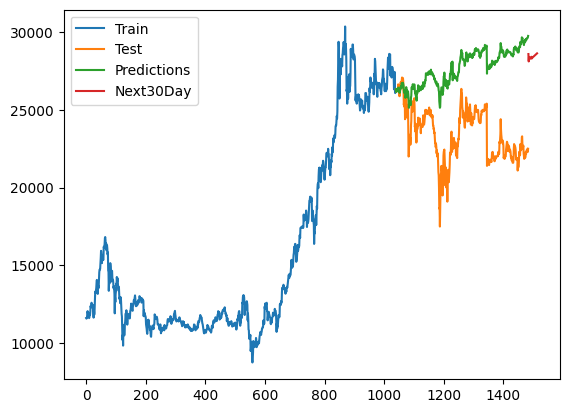

In [ ]:
# 10. Vẽ hình 7:3
plt.plot(train_data73.index, train_data73['Price'])
plt.plot(test_data73.index, test_data73['Price'])
plt.plot(test_data73.index, y_pred73)
plt.plot(last_data73,y_next_30_days73)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [ ]:
y_next_30_days73

In [ ]:
#RATIO 8:2

In [ ]:
# Split the data into training, testing, and validating sets
train_size82 = int(0.8 * len(df))
test_size82 = int(0.2 * len(df))

train_data82 = df[:train_size82]
test_data82 = df[train_size82:train_size82+test_size82]

In [ ]:
import statsmodels.api as sm
acf = sm.tsa.stattools.acf(train_data82['Price'], nlags= 700)

In [ ]:
# training
y_train82 = np.array(train_data82['Price'])

x_train82 = []
for data in train_data82['High']:
  x_train82.append([data])

model82 = dlm(y_train82)
model82 = model82 + trend(1, discount=0.99, name='Trend', w=1e7)
model82 = model82 + dynamic(features=x_train82, discount=1, name='High')
model82 = model82 + autoReg(degree=3, discount=0.99, name='ar', w=1e7)
model82 = model82 + longSeason(period=12, stay=30, data=y_train82, name='season', w=1e7)

model82.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [ ]:
# testing
x_test82= []
for data in test_data82['High']:
  x_test82.append([data])

y_test82 = np.array(test_data82['Price'])

y_pred82 = model82.predictN(date = model82.n-1, N=len(x_test82),featureDict={'High': x_test82})
y_pred82 = y_pred82[0]


In [ ]:
# Sử dụng linear regression dự báo cột high 30 ngày tiếp theo
from sklearn.linear_model import LinearRegression

ln_model82 = LinearRegression()

ln_model82.fit(np.array(train_data82.index).reshape(-1,1), train_data82['High'])


# Predict the prices for the next 30 days
last_index82 =  df.index[-1]
last_data82 = pd.RangeIndex(start=last_index82, stop=last_index82+30, step=1)

index_next_30_days82 = np.array(range(last_index82+1, last_index82+31)).reshape(-1, 1)
high_next_30_days82 = ln_model82.predict(index_next_30_days82)

print(high_next_30_days82)


[30797.9302949  30813.23973006 30828.54916521 30843.85860037
 30859.16803552 30874.47747067 30889.78690583 30905.09634098
 30920.40577613 30935.71521129 30951.02464644 30966.3340816
 30981.64351675 30996.9529519  31012.26238706 31027.57182221
 31042.88125737 31058.19069252 31073.50012767 31088.80956283
 31104.11899798 31119.42843314 31134.73786829 31150.04730344
 31165.3567386  31180.66617375 31195.9756089  31211.28504406
 31226.59447921 31241.90391437]


In [ ]:
# Dự báo giá cổ phiếu 30 ngày tiếp theo
x_next_30_days82 = []
for data in high_next_30_days82:
  x_next_30_days82.append([data])

y_next_30_days82 = model82.predictN(N = 30, featureDict={'High': x_next_30_days82})
y_next_30_days82 = y_next_30_days82[0]
print(y_next_30_days82)


[16837.487225703906, 16750.578336459133, 15943.811686516996, 15625.86114871179, 15483.359285666924, 14971.607230912261, 14818.327579294697, 14672.203880529556, 14362.730313788126, 14285.255402032159, 14161.151180515786, 13981.8281430243, 14052.611745612337, 13946.527598409175, 13866.412307092858, 13904.167462377001, 13828.176968860666, 13798.6248966434, 13816.113865961646, 13768.274801927993, 13762.57472578204, 13769.941705672887, 13743.749576595406, 13748.316368831503, 13752.014843147785, 13740.739225396697, 13749.236247728402, 13752.711332247522, 13750.966019600148, 13760.747390333738]


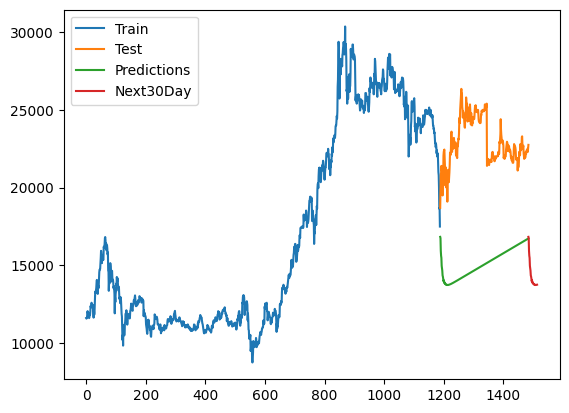

In [ ]:
# 10. Vẽ hình
plt.plot(train_data82.index, train_data82['Price'])
plt.plot(test_data82.index, test_data82['Price'])
plt.plot(test_data82.index, y_pred82)
plt.plot(last_data82,y_next_30_days82)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [ ]:
#RATIO 9:1

In [ ]:
# Split the data into training, testing, and validating sets
train_size91 = int(0.9 * len(df))
test_size91 = int(0.1 * len(df))

train_data91 = df[:train_size91]
test_data91 = df[train_size91:train_size91+test_size91]

In [ ]:
import statsmodels.api as sm
acf = sm.tsa.stattools.acf(train_data91['Price'], nlags= 700)

In [ ]:
# 4. Quá trình training
y_train91 = np.array(train_data91['Price'])

x_train91 = []
for data in train_data91['High']:
  x_train91.append([data])

model91 = dlm(y_train91)
model91 = model91 + trend(1, discount=0.99, name='Trend', w=1e7)
model91 = model91 + dynamic(features=x_train91, discount=1, name='High')
model91 = model91 + autoReg(degree=3, discount=0.99, name='ar', w=1e7)
model91 = model91 + longSeason(period=12, stay=30, data=y_train91, name='season', w=1e7)

model91.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [ ]:
# 5. Quá trình testing
x_test91= []
for data in test_data91['High']:
  x_test91.append([data])

y_test91 = np.array(test_data91['Price'])

y_pred91 = model91.predictN(date = model91.n-1, N=len(x_test91),featureDict={'High': x_test91})
y_pred91 = y_pred91[0]


In [ ]:
#  8. Sử dụng linear regression dự báo cột high 30 ngày tiếp theo
from sklearn.linear_model import LinearRegression

ln_model91 = LinearRegression()

ln_model91.fit(np.array(train_data91.index).reshape(-1,1), train_data91['High'])


# Predict the prices for the next 30 days
last_index91 =  df.index[-1]
last_data91 = pd.RangeIndex(start=last_index91, stop=last_index91+30, step=1)

index_next_30_days91 = np.array(range(last_index91+1, last_index91+31)).reshape(-1, 1)
high_next_30_days91 = ln_model91.predict(index_next_30_days91)

print(high_next_30_days91)


[29111.52113588 29125.25646745 29138.99179902 29152.7271306
 29166.46246217 29180.19779374 29193.93312531 29207.66845689
 29221.40378846 29235.13912003 29248.87445161 29262.60978318
 29276.34511475 29290.08044633 29303.8157779  29317.55110947
 29331.28644105 29345.02177262 29358.75710419 29372.49243576
 29386.22776734 29399.96309891 29413.69843048 29427.43376206
 29441.16909363 29454.9044252  29468.63975678 29482.37508835
 29496.11041992 29509.8457515 ]


In [ ]:
# 9. Dự báo giá cổ phiếu 30 ngày tiếp theo
x_next_30_days91 = []
for data in high_next_30_days91:
  x_next_30_days91.append([data])

y_next_30_days91 = model91.predictN(N = 30, featureDict={'High': x_next_30_days91})
y_next_30_days91 = y_next_30_days91[0]
print(y_next_30_days91)


[25030.06786363756, 25043.875446185535, 25065.707174123898, 25085.36847135787, 25104.117929604872, 25123.164603853515, 25142.151915783892, 25161.094034977592, 25180.046157007524, 25198.997018666745, 25217.945807884586, 25236.894888436564, 25255.843960592843, 25274.792942965083, 25549.054787888002, 25584.956244026587, 25602.020616511345, 25631.21362558136, 25651.566793995145, 25670.410218723788, 25689.759705406217, 25708.79465679875, 25727.74025879509, 25746.704585738506, 25765.65818882834, 25784.60716034877, 25803.556725922484, 25822.50594161958, 25841.45493535084, 25860.403943060686]


In [ ]:
# 9. Dự báo giá cổ phiếu 30 ngày tiếp theo
x_next_30_days91 = []
for data in high_next_30_days91:
  x_next_30_days91.append([data])

y_next_30_days91 = model91.predictN(N = 30, featureDict={'High': x_next_30_days91})
y_next_30_days91 = y_next_30_days91[0]
print(y_next_30_days91)


[25030.06786363756, 25043.875446185535, 25065.707174123898, 25085.36847135787, 25104.117929604872, 25123.164603853515, 25142.151915783892, 25161.094034977592, 25180.046157007524, 25198.997018666745, 25217.945807884586, 25236.894888436564, 25255.843960592843, 25274.792942965083, 25549.054787888002, 25584.956244026587, 25602.020616511345, 25631.21362558136, 25651.566793995145, 25670.410218723788, 25689.759705406217, 25708.79465679875, 25727.74025879509, 25746.704585738506, 25765.65818882834, 25784.60716034877, 25803.556725922484, 25822.50594161958, 25841.45493535084, 25860.403943060686]


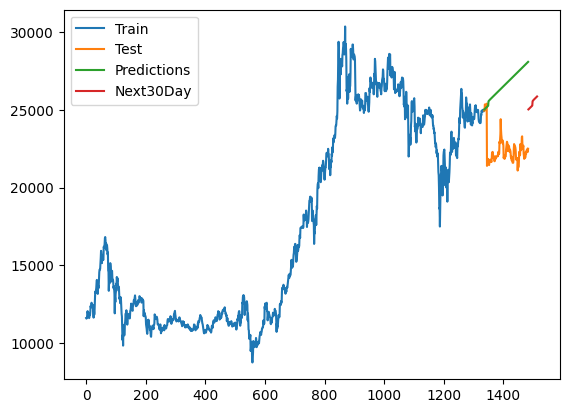

In [ ]:
# 10. Vẽ hình
plt.plot(train_data91.index, train_data91['Price'])
plt.plot(test_data91.index, test_data91['Price'])
plt.plot(test_data91.index, y_pred91)
plt.plot(last_data91,y_next_30_days91)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [ ]:
#ACCURACY EVALUATION

In [ ]:
#method to calculate mape
def calc_mape(actual, predicted):

    # Convert to numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Calculate absolute percentage error
    absolute_error = np.abs((actual - predicted) / actual)

    # Handle division by zero cases
    absolute_error[np.isinf(absolute_error)] = 0.0

    # Calculate mean absolute percentage error
    mape = np.mean(absolute_error) * 100

    return mape

In [ ]:
#accuracy evaluate 7:3
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as msle
test_rmse73 = np.sqrt(np.mean((y_pred73 - y_test73)**2))
test_mape73 = calc_mape(y_test73, y_pred73)
test_mae73 = mae(y_test73, y_pred73)
test_msle73 = msle(y_test73, y_pred73)

print(test_rmse73)
print(test_mape73)
print(test_mae73)
print(test_msle73)

4713.9873722881175
18.77390770258809
4254.851273440741
0.03528973720195927


In [ ]:
#accuracy evaluate 8:2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as msle
test_rmse82 = np.sqrt(np.mean((y_pred82 - y_test82)**2))
test_mape82 = calc_mape(y_test82, y_pred82)
test_mae82 = mae(y_test82, y_pred82)
test_msle82 = msle(y_test82, y_pred82)

print(test_rmse82)
print(test_mape82)
print(test_mae82)
print(test_msle82)

8012.259584689786
33.62453575929133
7782.625312141453
0.1812418474983528


In [ ]:
#accuracy evaluate 9:1
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as msle

test_rmse91 = np.sqrt(np.mean((y_pred91 - y_test91)**2))
test_mape91 = calc_mape(y_test91, y_pred91)
test_mae91 = mae(y_test91, y_pred91)
test_msle91 = msle(y_test91, y_pred91)

print(test_rmse91)
print(test_mape91)
print(test_mae91)
print(test_msle91)


4477.550629150072
19.260050919410375
4271.383099347535
0.03345640089461728
